<a href="https://colab.research.google.com/github/AxelM007/CLASES_DIPLOMADO/blob/main/Practica2ModiloII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

### <span style="font-family: 'Georgia', serif; font-size: 2em; color: #2C3E50;"><b>UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO</b></span>

# <span style="font-family: 'Georgia', serif; font-size: 2.5em; color: #2C3E50;"><b>TÉCNICAS ESTADÍSTICAS Y MINERÍA DE DATOS</b></span>

---

## <span style="font-family: 'Georgia', serif; font-size: 2em; color: #34495E;">Calcular las leyes de las variables aleatorias</span>

---

<img src="https://drive.google.com/uc?export=view&id=15gJeBenxjYEpZLOGsxrjKmMTA_lbMuWR" alt="Logo" width="150" style="border-radius: 15px; border: 2px solid #2980B9;">

<br>

### <span style="font-family: 'Georgia', serif; font-size: 1.5em; color: #2980B9;">EQUIPO 06:</span>

<span style="font-family: 'Georgia', serif; font-size: 1.2em; color: #2980B9;"><b>Ashley Pamela Texis Toledo</b></span>  
<span style="font-family: 'Georgia', serif; font-size: 1.2em; color: #2980B9;"><b>Juan Antonio Jiménez González </b></span>  
<span style="font-family: 'Georgia', serif; font-size: 1.2em; color: #2980B9;"><b>Pedro Axel Méndez López</b></span>  
<span style="font-family: 'Georgia', serif; font-size: 1.2em; color: #2980B9;"><b>Sandra Xochiquetzalli Hernández Nájera</b></span>  

<br>

### <span style="font-family: 'Georgia', serif; font-size: 1.2em; color: #2980B9;">Fecha: <b>11 de septiembre de 2024</b></span>

---


</div>

</div>
INSTRUCCIONES:

1.   Documenta tu colab

2.   Calcular la ley de las siguientes variables aleatorias
     *   La diferencia de las caras es mayor que 1
     *   La suma de las caras sea par
3. Verifica en cada caso, que
   $$\sum_{k\in R_{X}}\mathbb{P}(X=k) = 1$$
4. Gráfica y calcula la función de distribución de la v.a. S (la suma de los resultados es n)  
     Aquí pueden utilizar Python (para los que ya tengan conocimiento previo de matplotlib) o dibujado a mano / tablet /etc
5. Sube tu notebook a GitHub

In [3]:
# IMPORTAMOS LAS LIBRERÍAS
import numpy as np
import matplotlib.pyplot as plot
from itertools import product

In [7]:
#Primero vamos a crear a nuestro espacio muestral Omega
L = [i for i in range(1,7)] #Lista por comprensión
#print(L)
Omega = set(product(L, repeat=2))
# Omega

## Como paso **"cero"** vamos a definir nuestra f.d.p

In [19]:
from fractions import Fraction as frac

def p(E): #E un evento
  p = frac(len(E),len(Omega))
  return p

## 1. DIFERENCIA MAYOR A 1

Notemos que $S_1$ es un evento dicotomico donde o la diferencia es mayor a 1, o no lo es, entonces definiendo el evento podemos determinar la ley como una variable $Bernoulli(p)$ donde $p=\mathbb{P}[S_1]$

$$\displaystyle \operatorname {P} [X=x]=p^{x}(1-p)^{1-x}\qquad x=0,1$$

In [25]:
# Definimos el evento tal que considere las diferencias mayores a 1
from collections import defaultdict
dS = defaultdict(set) #lista
S1 = {(i, j): abs(i - j) for i, j in Omega if abs(i - j) > 1}
S1c = Omega.difference(S1)
print(f"El evento S1 es: {S1}")   # La tercera coordenada es "S1"
print(f"El evento S1c es: {S1c}")   # La tercera coordenada es "S1c"



El evento S1 es: {(3, 1): 2, (4, 6): 2, (5, 1): 4, (1, 6): 5, (2, 5): 3, (1, 3): 2, (6, 2): 4, (4, 2): 2, (3, 6): 3, (5, 3): 2, (2, 4): 2, (1, 5): 4, (6, 1): 5, (6, 4): 2, (4, 1): 3, (3, 5): 2, (5, 2): 3, (1, 4): 3, (2, 6): 4, (6, 3): 3}
El evento S1c es: {(4, 4), (1, 2), (5, 5), (3, 4), (6, 5), (4, 3), (2, 1), (5, 4), (1, 1), (2, 3), (4, 5), (3, 3), (5, 6), (2, 2), (6, 6), (3, 2)}


In [31]:
## Veamos ahora que la suma es efectivamente es 1
print(p(S1)+p(S1c))

1


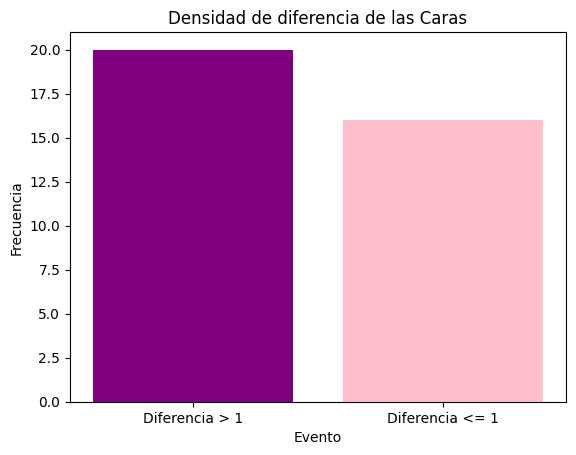

In [34]:
# Gráfico de barras mostrando la cantidad de eventos en S1 y S1c
eventos = ['Diferencia > 1', 'Diferencia <= 1']
frecuencias = [len(S1), len(S1c)]

# Crear gráfico de barras
plt.bar(eventos, frecuencias, color=['purple', 'pink'])
plt.title('Densidad de diferencia de las Caras')
plt.xlabel('Evento')
plt.ylabel('Frecuencia')
plt.show()

Nota: como es dicotómica la "Ley" está determinada simplemente por la medida de probabilidad $$\mathbb{P}[S_1]=\frac{|S_1|}{|\Omega|}$$


---

## 1. SUMA DE CARAS PAR

Notemos nuevamente que $S_2$ es un evento dicotómico donde o la suma es par, o no lo es, entonces definiendo el evento podemos determinar la ley como una variable $Bernoulli(p)$ donde $p=\mathbb{P}[S_2]$


In [39]:
S2 = {(i, j) for i, j in Omega if abs(i - j) > 1 and (i + j) % 2 == 0}

# Complemento de S1: eventos donde la diferencia es <= 1 o la suma es impar
S2c = Omega.difference(S2)

print(f"El evento S1 es: {S2}")   # La tercera coordenada es "S1"
print(f"El evento S1c es: {S2c}")   # La tercera coordenada es "S1c"

El evento S1 es: {(6, 2), (2, 4), (1, 5), (3, 1), (4, 6), (5, 1), (4, 2), (6, 4), (2, 6), (5, 3), (1, 3), (3, 5)}
El evento S1c es: {(3, 4), (4, 3), (5, 4), (2, 2), (1, 6), (2, 5), (6, 5), (4, 5), (3, 3), (5, 6), (3, 6), (1, 2), (2, 1), (6, 1), (3, 2), (4, 1), (5, 2), (4, 4), (5, 5), (1, 1), (1, 4), (2, 3), (6, 6), (6, 3)}


In [40]:
## Veamos ahora que la suma es efectivamente es 1
print(p(S2)+p(S2c))

1


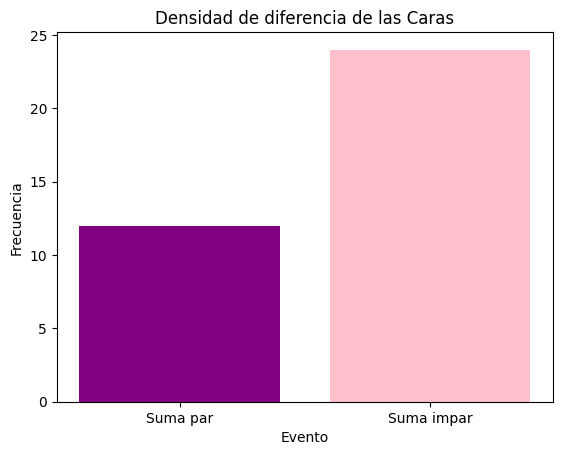

In [42]:
# Gráfico de barras mostrando la cantidad de eventos en S2 y S2c
eventos = ['Suma par', 'Suma impar']
frecuencias = [len(S2), len(S2c)]

# Crear gráfico de barras
plt.bar(eventos, frecuencias, color=['purple', 'pink'])
plt.title('Densidad de diferencia de las Caras')
plt.xlabel('Evento')
plt.ylabel('Frecuencia')
plt.show()